### 코로나 추세 & 수출 데이터 시각화 / 분석

In [1]:
# Reserve_Pandas - InteractiveShell
#설정변경코드
#변수 명이 두번 이상 출력되어도 모두 콘솔에서 보여줄 것
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')

# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
    
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

# pearson 상관관계 분석을 위한 package import
from scipy.stats import *

import seaborn as sns

In [2]:
df_covidExp=pd.read_csv('output/코로나수출_필요데이터(최종).csv')
del df_covidExp['Unnamed: 0']
df_covidExp

,날짜,수출금액,국내월별확진자,전세계월별확진자
0,2020-03,46167204,6855,747267
1,2020-04,36270183,979,2311509
2,2020-05,34854511,703,2891921
3,2020-06,39214071,1331,4277169
4,2020-07,42785144,1506,7036270
5,2020-08,39469231,5642,8288030
6,2020-09,47819948,3865,8690268
7,2020-10,44818534,2699,12367392
8,2020-11,45751883,7688,17058500
9,2020-12,51332449,26523,19035159


<Figure size 1080x648 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Export Amount in USD(unit:1000USD)')

Text(0.5, 1.0, 'Republic of Korea Export Amount in USD (unit:1000USD)')

(32000000.0, 64000000.0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

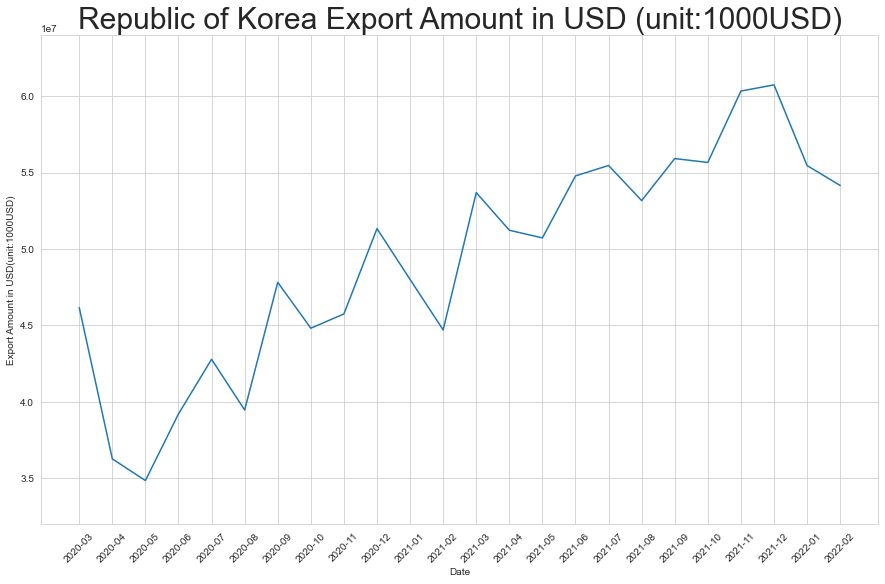

In [7]:
### 분석 대상 그래프 표현
# 전세계 월별 코로나 확진자 추이
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
x = df_covidExp['날짜']
y = df_covidExp['수출금액']
plt.plot(x,y)

plt.xlabel('Date')
plt.ylabel('Export Amount in USD(unit:1000USD)')
plt.title('Republic of Korea Export Amount in USD (unit:1000USD)', size=30)
plt.ylim((32000000,64000000))
# 가독성을 위해 x축 시각표현 수정
plt.xticks(rotation=45)

plt.fill_between(x[24:48], y[24:48], color='blue', alpha=0.1)

plt.show()

In [4]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

### 코로나(국내/전세계) & 수출금액 시각화 / 분석

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Export amount(unit:1000USD)')

Text(0, 0.5, 'Korea Covid Case')

Text(0, 0.5, 'Global Covid Case')

Text(0.5, 1.0, 'Korea Export Amount(red), Korea Covid Case(green), Global Covid Case(blue)')

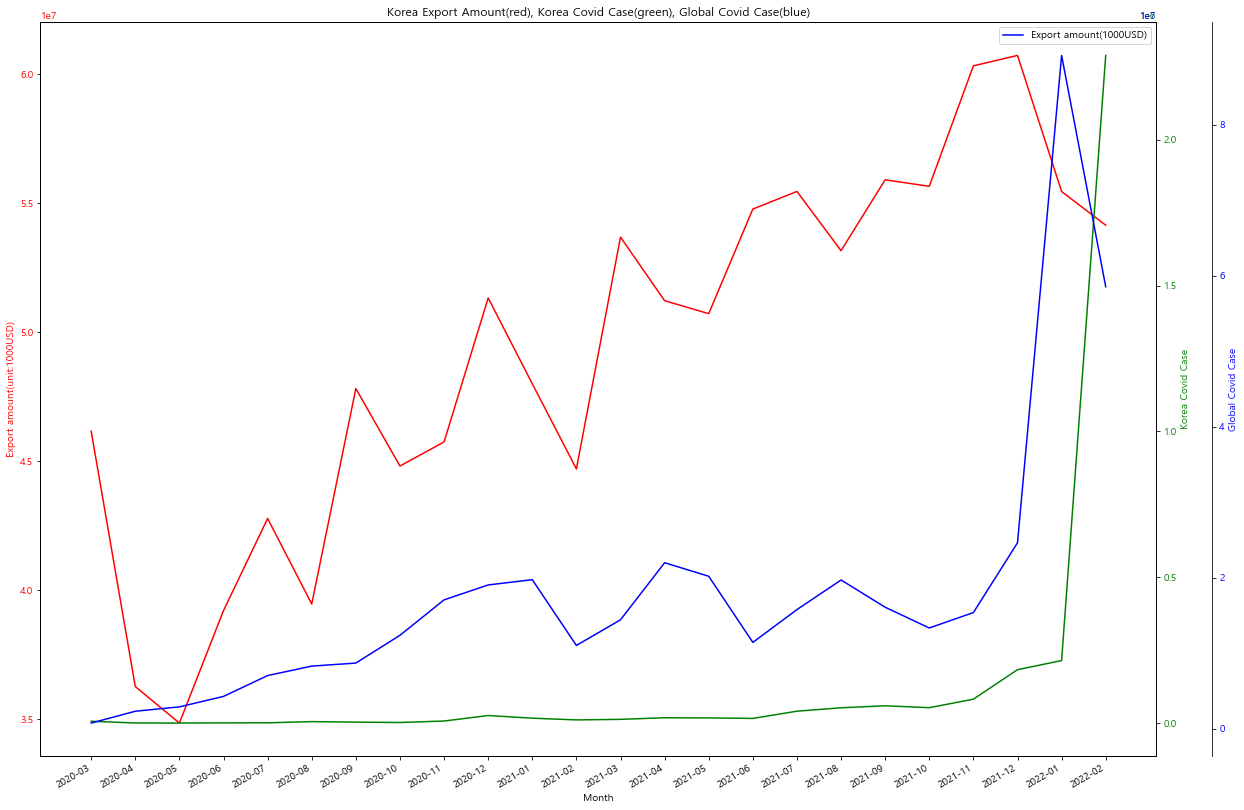

In [5]:
# 시각화 작업
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot()

# 날짜 & 수출금액
ax.plot(df_covidExp['날짜'],df_covidExp['수출금액'],
       color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Export amount(unit:1000USD)', color='red')
ax.tick_params(axis='y', labelcolor='red')

# 날짜 & 국내월별확진자
ax1 = ax.twinx()
ax1.plot(df_covidExp['날짜'],df_covidExp['국내월별확진자'],
       color='green',)
ax1.set_ylabel('Korea Covid Case', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 날짜 & 전세계월별확진자
ax2 = ax.twinx()
ax2.plot(df_covidExp['날짜'],df_covidExp['전세계월별확진자'],
       color='blue')
ax2.set_ylabel('Global Covid Case', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.spines.right.set_position(("axes", 1.05))

# 범례(legend) 추가
plt.legend(['Export amount(1000USD)','Korea Covid Case','Global Covid Case'],
          loc = 'upper right')

# x축 정리
ax.fmt_xdata = DateFormatter('% Y-% m')

# 제목(title) 생성
plt.title('Korea Export Amount(red), Korea Covid Case(green), Global Covid Case(blue)')
fig.autofmt_xdate()

In [6]:
### 피어슨(pearson) 상관관계 분석
from scipy.stats import *

### 국내 월별 확진자수 & 수출금액 회귀 분석

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Covid Case & Korea Export Amount')

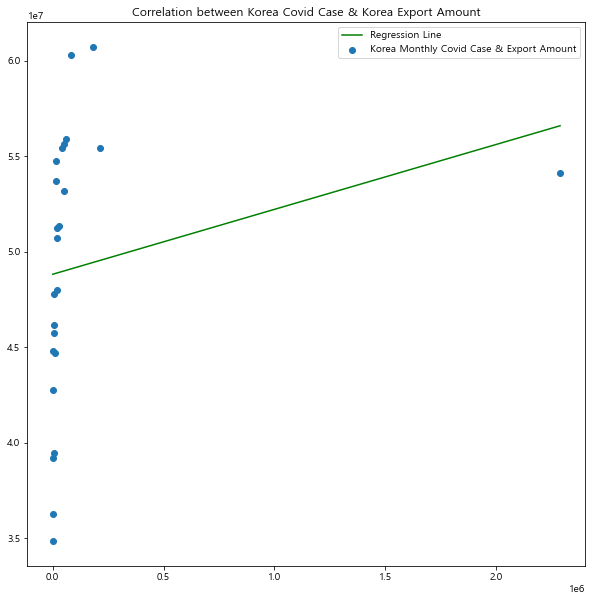

In [7]:
poly_fit1 = np.polyfit(df_covidExp['국내월별확진자'].values, df_covidExp['수출금액'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(df_covidExp['국내월별확진자'].values.min(), df_covidExp['국내월별확진자'].values.max()) # x axis
ys = poly_1d(xs)

plt.figure(figsize=(10,10))
plt.title('Correlation between Korea Covid Case & Korea Export Amount')

# 산점도(scatter)
plt.scatter(df_covidExp['국내월별확진자'].values, df_covidExp['수출금액'].values, label='Korea Monthly Covid Case & Export Amount')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [8]:
print(pearsonr(df_covidExp['국내월별확진자'], df_covidExp['수출금액']))

(0.21810405254941484, 0.30591066927662064)


### 전세계 월별 확진자수 & 수출금액 회귀 분석

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Global Covid Case & Korea Export Amount')

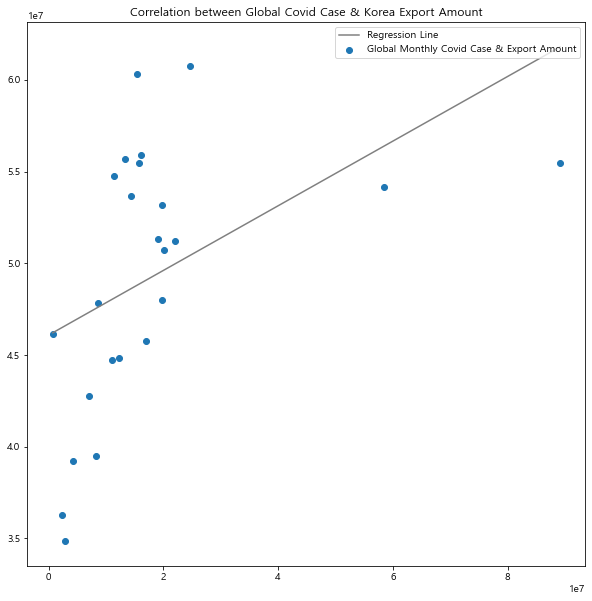

In [9]:
poly_fit1 = np.polyfit(df_covidExp['전세계월별확진자'].values, df_covidExp['수출금액'].values, 1)
poly_2d = np.poly1d(poly_fit1)
xs = np.linspace(df_covidExp['전세계월별확진자'].values.min(), df_covidExp['전세계월별확진자'].values.max()) # x axis
ys = poly_2d(xs)

plt.figure(figsize=(10,10))
plt.title('Correlation between Global Covid Case & Korea Export Amount')

# 산점도(scatter)
plt.scatter(df_covidExp['전세계월별확진자'].values, df_covidExp['수출금액'].values, label='Global Monthly Covid Case & Export Amount')

# 회귀직선
plt.plot(xs, ys, color='grey', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [10]:
# 피어슨 상관관계 분석
print(pearsonr(df_covidExp['전세계월별확진자'], df_covidExp['수출금액']))

(0.4617046766674182, 0.02313565156130903)
